In [20]:
# Breast Ultrasound Classification - Full Notebook Script
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [21]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
# Dataset path
dataset_path = "C:/Users/Student/Desktop/breastcancerbigdata/Dataset_BUSI_with_GT"
IMG_SIZE = (128, 128)


In [40]:
# Load dataset
def load_dataset(dataset_path, img_size=(128, 128)):
    images, labels = [], []
    categories = ['benign', 'malignant', 'normal']
    for category in categories:
        image_paths = glob(os.path.join(dataset_path, category, f"{category} (*).png"))
        image_paths = [p for p in image_paths if not p.endswith('_mask.png')]
        for img_path in image_paths:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(category)
    return np.array(images), np.array(labels)


In [45]:

# Load dataset
dataset_path = "C:/Users/Student/Desktop/breastcancerbigdata/Dataset_BUSI_with_GT"
images, labels = load_dataset(dataset_path, IMG_SIZE)
print(f"Loaded {len(images)} images with shape {images.shape}")
print(f"Sample labels: {np.unique(labels, return_counts=True)}")


def load_dataset(dataset_path, img_size=(128, 128)):
    images, labels = [], []
    categories = ['benign', 'malignant', 'normal']
    for category in categories:
        image_paths = glob(os.path.join(dataset_path, category, "*.png"))
        image_paths = [p for p in image_paths if not p.endswith('_mask.png')]
        for img_path in image_paths:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(category)
    return np.array(images), np.array(labels)

# Load and preprocess data
IMG_SIZE = (128, 128)
images, labels = load_dataset(dataset_path, IMG_SIZE)
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
class_names = le.classes_

X_ml = images.reshape(len(images), -1) / 255.0
X_cnn = images[..., np.newaxis] / 255.0

X_train_ml, X_test_ml, y_train, y_test = train_test_split(
    X_ml, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
X_train_cnn, X_test_cnn = (
    X_train_ml.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1),
    X_test_ml.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
)

def evaluate_model(model_name, y_true, y_pred, class_names):
    print(f"\n--- {model_name} ---")
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

Loaded 798 images with shape (798, 128, 128)
Sample labels: (array(['benign', 'malignant', 'normal'], dtype='<U9'), array([454, 211, 133]))



Training SVM...

--- SVM ---
Accuracy:  0.7438
Precision: 0.7489
Recall:    0.6728
F1 Score:  0.6984

Classification Report:
              precision    recall  f1-score   support

      benign       0.76      0.86      0.81        91
   malignant       0.66      0.64      0.65        42
      normal       0.82      0.52      0.64        27

    accuracy                           0.74       160
   macro avg       0.75      0.67      0.70       160
weighted avg       0.75      0.74      0.74       160



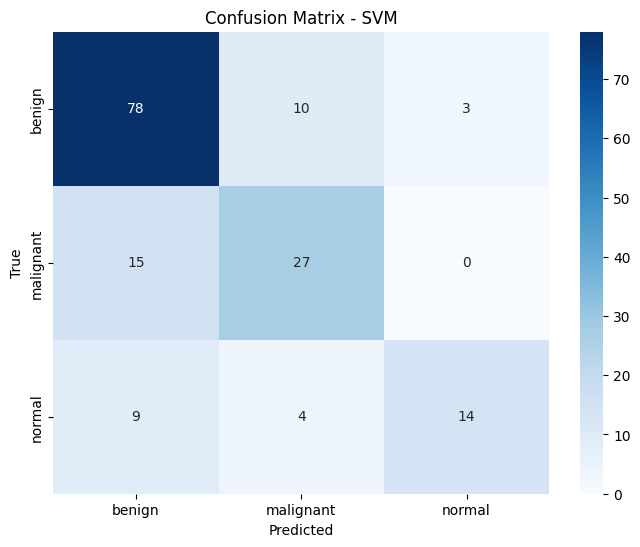


Training KNN...

--- KNN ---
Accuracy:  0.6000
Precision: 0.5260
Recall:    0.5238
F1 Score:  0.5247

Classification Report:
              precision    recall  f1-score   support

      benign       0.71      0.71      0.71        91
   malignant       0.51      0.52      0.52        42
      normal       0.36      0.33      0.35        27

    accuracy                           0.60       160
   macro avg       0.53      0.52      0.52       160
weighted avg       0.60      0.60      0.60       160



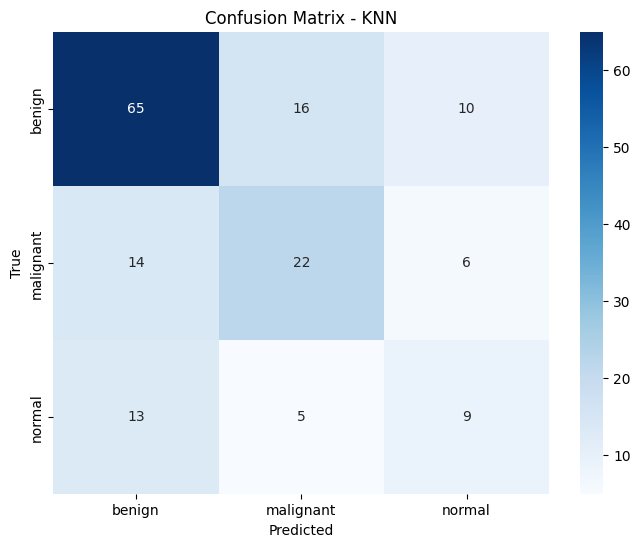


Training Random Forest...

--- Random Forest ---
Accuracy:  0.7188
Precision: 0.8301
Recall:    0.5805
F1 Score:  0.6225

Classification Report:
              precision    recall  f1-score   support

      benign       0.68      0.95      0.79        91
   malignant       0.81      0.50      0.62        42
      normal       1.00      0.30      0.46        27

    accuracy                           0.72       160
   macro avg       0.83      0.58      0.62       160
weighted avg       0.77      0.72      0.69       160



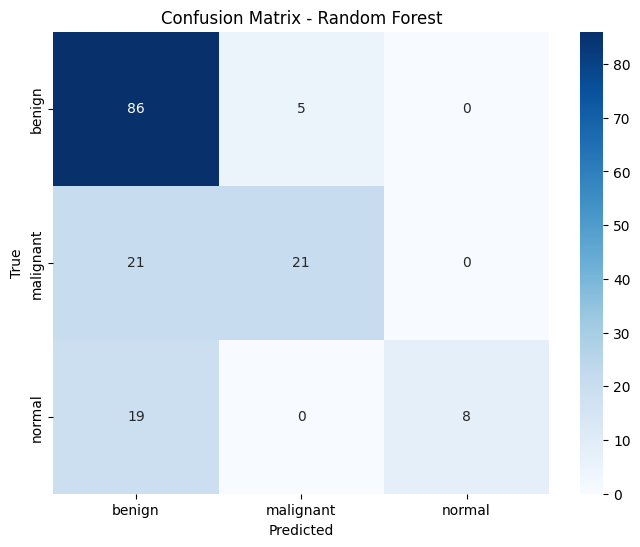


Training Logistic Regression...

--- Logistic Regression ---
Accuracy:  0.7000
Precision: 0.6998
Recall:    0.6385
F1 Score:  0.6578

Classification Report:
              precision    recall  f1-score   support

      benign       0.73      0.79      0.76        91
   malignant       0.60      0.64      0.62        42
      normal       0.76      0.48      0.59        27

    accuracy                           0.70       160
   macro avg       0.70      0.64      0.66       160
weighted avg       0.70      0.70      0.70       160



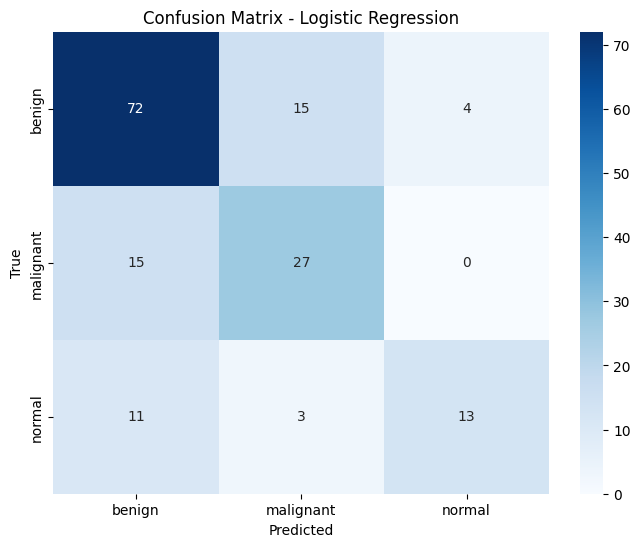

In [46]:
# Classical ML Models
print("\nTraining SVM...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_ml, y_train)
evaluate_model("SVM", y_test, svm.predict(X_test_ml), class_names)

print("\nTraining KNN...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_ml, y_train)
evaluate_model("KNN", y_test, knn.predict(X_test_ml), class_names)

print("\nTraining Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_ml, y_train)
evaluate_model("Random Forest", y_test, rf.predict(X_test_ml), class_names)

print("\nTraining Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_ml, y_train)
evaluate_model("Logistic Regression", y_test, lr.predict(X_test_ml), class_names)

In [ ]:
# CNN Model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model


In [64]:
# Track test accuracy manually
test_accuracies = []

class TestAccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_acc = self.model.evaluate(X_test_cnn, y_test, verbose=0)
        test_accuracies.append(test_acc)

cnn_model = create_cnn_model((128, 128, 1), len(class_names))


cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Train CNN
history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    callbacks=[TestAccuracyCallback()],
    verbose=1
)

Epoch 1/25


C:\Users\Student\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5665 - loss: 1.0011 - val_accuracy: 0.5688 - val_loss: 0.9340
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5888 - loss: 0.9150 - val_accuracy: 0.6125 - val_loss: 0.9184
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6566 - loss: 0.8491 - val_accuracy: 0.6125 - val_loss: 0.8494
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6890 - loss: 0.7525 - val_accuracy: 0.6812 - val_loss: 0.7643
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7379 - loss: 0.6288 - val_accuracy: 0.7125 - val_loss: 0.7166
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7864 - loss: 0.5434 - val_accuracy: 0.7375 - val_loss: 0.7260
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8021 - loss: 0.4888 - val_accuracy: 0.7188 - val_loss: 0.7660
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8104 - loss: 0.4582 - val_accuracy: 0.7437 - val_loss: 0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

--- CNN ---
Accuracy:  0.7500
Precision: 0.7623
Recall:    0.6554
F1 Score:  0.6822

Classification Report:
              precision    recall  f1-score   support

      benign       0.74      0.95      0.83        91
   malignant       0.82      0.43      0.56        42
      normal       0.73      0.59      0.65        27

    accuracy                           0.75       160
   macro avg       0.76      0.66      0.68       160
weighted avg       0.76      0.75      0.73       160



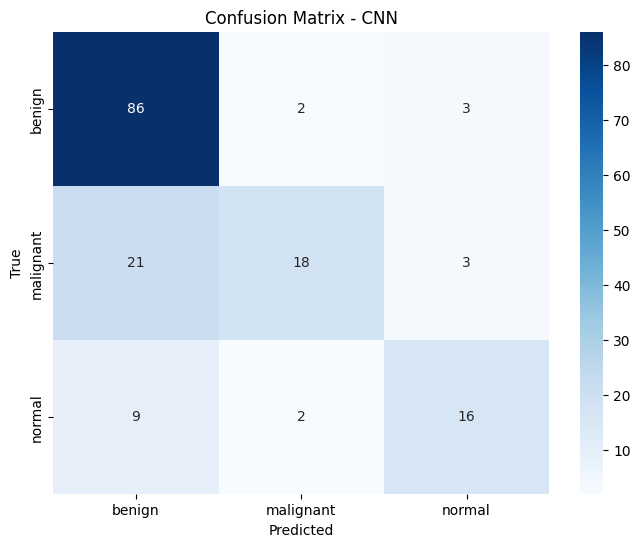

In [65]:

# Evaluate CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
evaluate_model("CNN", y_test, y_pred_cnn, class_names)

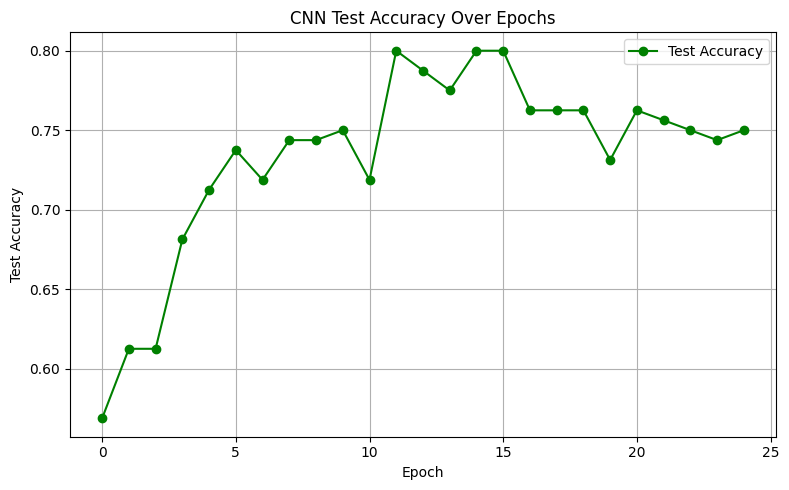

In [66]:

# Plot Test Accuracy Over Epochs
plt.figure(figsize=(8, 5))
plt.plot(test_accuracies, label='Test Accuracy', color='green', marker='o')
plt.title("CNN Test Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()